In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# MNIST 데이터셋 
train_data = datasets.CIFAR10(
    root="../data",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
)

test_data = datasets.CIFAR10(
    root="../data",
    train=False,
    download=True,
    transform=transforms.ToTensor(),
)

# Data loader
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [2]:
print('CIFAR10 data size:', train_data.data[0].shape)

CIFAR10 data size: (32, 32, 3)


In [3]:
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
# 시각화 함수
def visualize(augmentation_func):
    fig, subplots = plt.subplots(2, 4, figsize=(14, 7)) # 2행 4열에 size 14x7
    for i in range(4):
        axi1 = subplots.flat[i]
        axi2 = subplots.flat[i+4]

        original_img = Image.fromarray(train_data.data[i])
        augmented_img = augmentation_func(original_img)

        axi1.imshow(original_img)
        axi2.imshow(augmented_img)
        axi1.set_title('original_img')
        axi2.set_title('augmented_img')

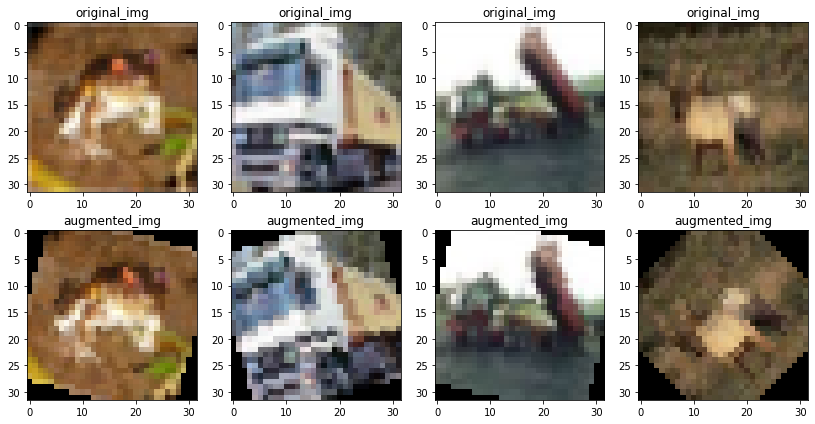

In [5]:
# Random Rotation
rotation = transforms.RandomRotation(90) # -90에서 90도로 랜덤으로 돌린다는 의미
visualize(rotation)

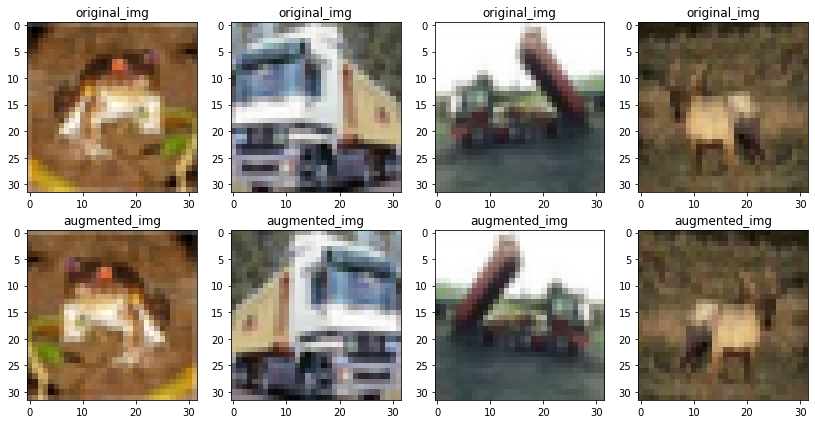

In [6]:
# Random Horizontal Flip
horizontal_flip = transforms.RandomHorizontalFlip(p=1) # p의 확률로 RandomHorizontalFlip이 적용
visualize(horizontal_flip)

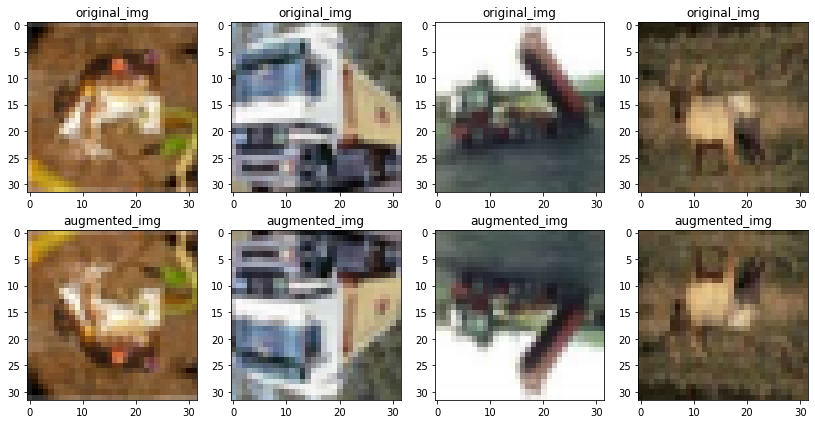

In [7]:
# Random Vertical Flip
vertical_flip = transforms.RandomVerticalFlip(p=1)
visualize(vertical_flip)

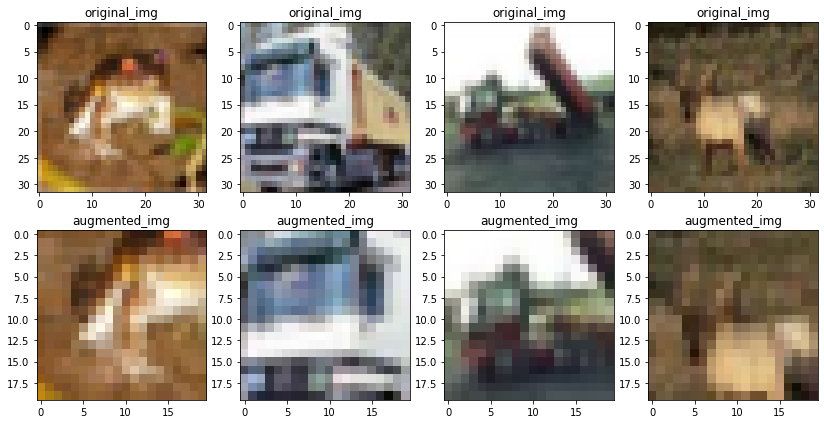

In [8]:
# Random Crop
crop = transforms.RandomCrop((20, 20)) # 현재 이미지 사이즈 32x32에서 20x20 만큼 자름
visualize(crop)

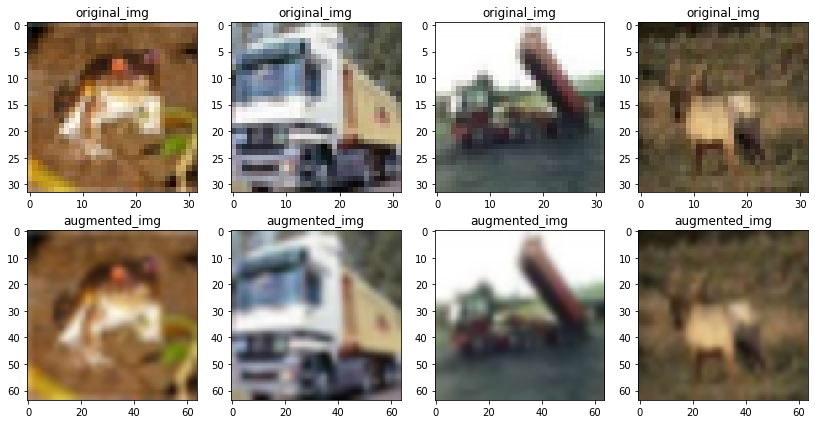

In [9]:
# Resize
resize = transforms.Resize((64,64)) # 원래 32x32 -> 64x64
visualize(resize)

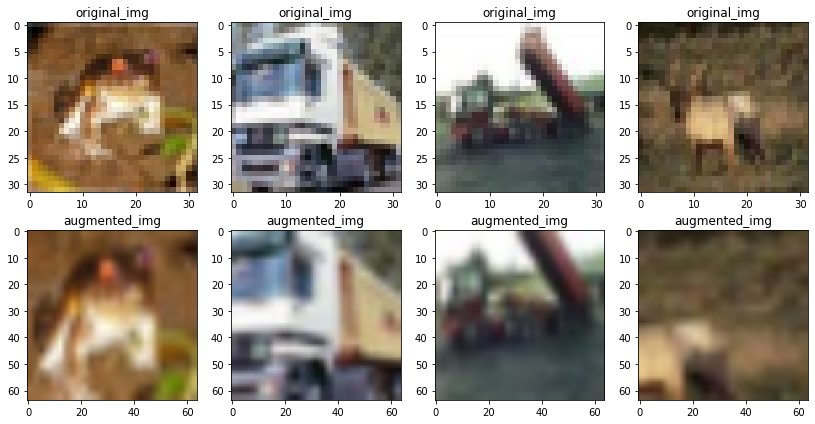

In [10]:
# Random Resized Crop
resized_crop = transforms.RandomResizedCrop((64,64)) # Crop 후 32x32 -> 64x64 로 resize
visualize(resized_crop) 

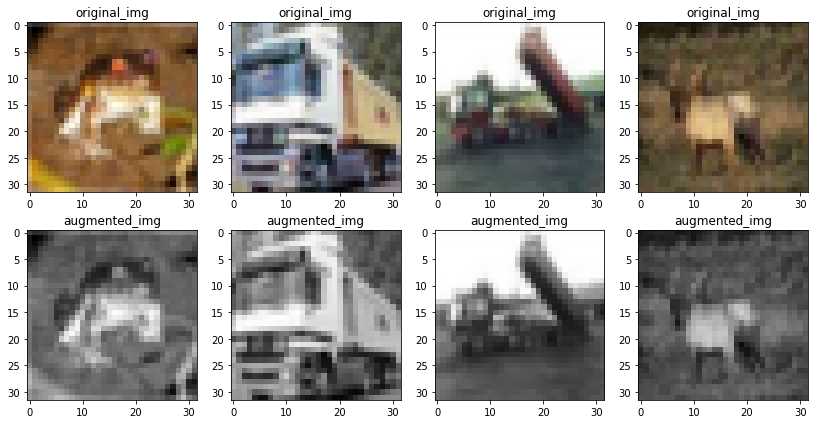

In [11]:
# Random Gray Scale
gray = transforms.RandomGrayscale(p=1) # p=1의 확률 적용
visualize(gray)

C:\Users\sclab\anaconda3\lib\site-packages\torchvision\transforms\functional.py:594: UserWarning: torch.lstsq is deprecated in favor of torch.linalg.lstsq and will be removed in a future PyTorch release.
torch.linalg.lstsq has reversed arguments and does not return the QR decomposition in the returned tuple (although it returns other information about the problem).
To get the qr decomposition consider using torch.linalg.qr.
The returned solution in torch.lstsq stored the residuals of the solution in the last m - n columns of the returned value whenever m > n. In torch.linalg.lstsq, the residuals in the field 'residuals' of the returned named tuple.
The unpacking of the solution, as in
X, _ = torch.lstsq(B, A).solution[:A.size(1)]
should be replaced with
X = torch.linalg.lstsq(A, B).solution (Triggered internally at  ..\aten\src\ATen\LegacyTHFunctionsCPU.cpp:389.)
  res = torch.lstsq(b_matrix, a_matrix)[0]


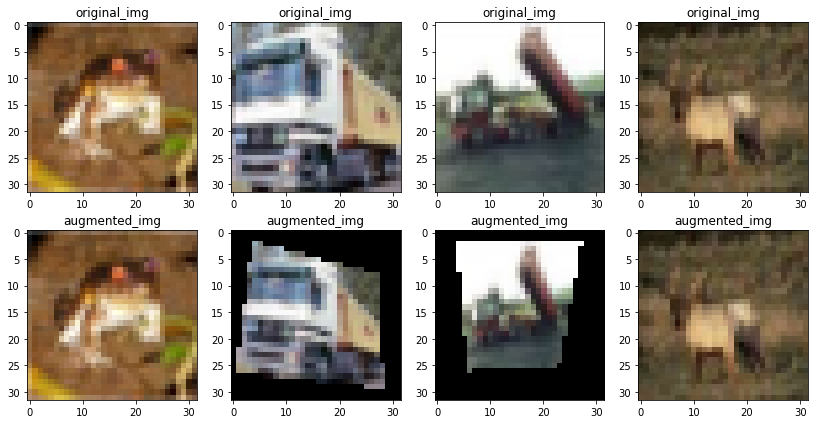

In [12]:
# Random Perspective
perspective = transforms.RandomPerspective()
visualize(perspective)

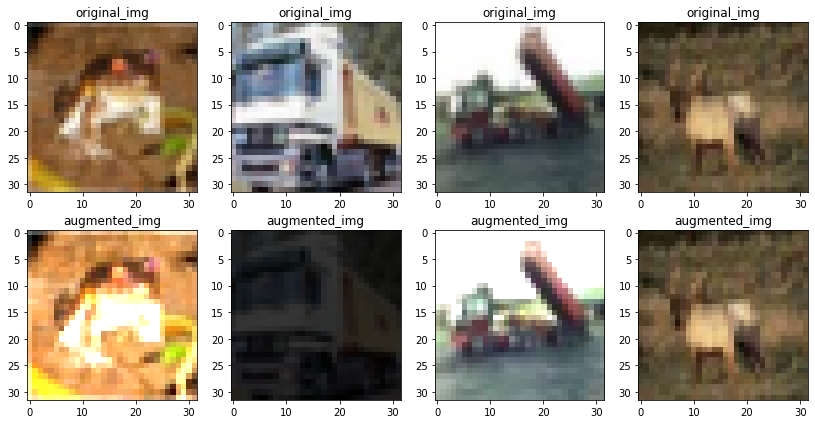

In [13]:
# Color Jutter
jitter = transforms.ColorJitter(brightness=(0.2,2)) # (min, max)
visualize(jitter)

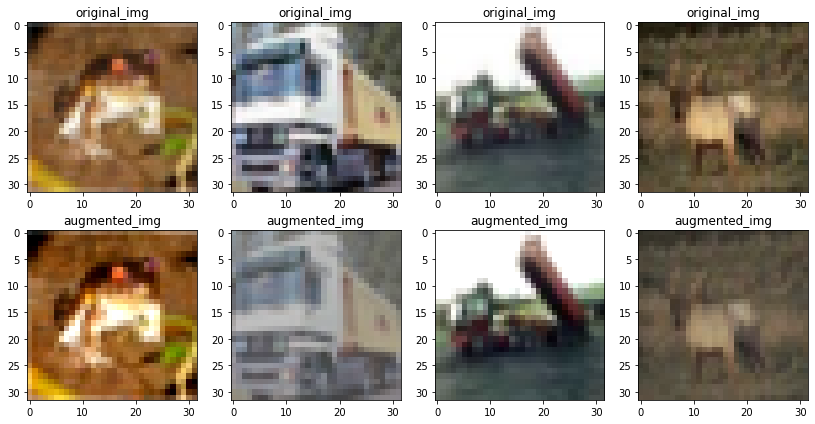

In [14]:
jitter = transforms.ColorJitter(contrast=(0.2,2)) # (min, max)
visualize(jitter)